<a href="https://colab.research.google.com/github/DanielTusingwire/CUU-Lab-2024/blob/main/simpleRL_CAT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Linear Regression model**

Q1:
	a) Find variables that are strongly related to Revenue($M).  (2 marks)

b) Produce Simple Linear Regression model by showing the:

i)  Graphical representation.  (2 marks)

ii) Intercept. (2 marks)

iii) Coefficient. (2 marks)

iv) The model relationship in the form of y=mx+C. (2 marks


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [ ]:
my_file_path = '/content/drive/MyDrive/BSE 3 2/Simulation & Modeling Labs/CAT1 /budget.csv'

df = pd.read_csv(my_file_path)

df

,Year,Global GDP Index per Capita,#Cust serv Calls ('000s),#Employess ('000),#Items ('000),#Revenue ($M),Unnamed: 6
0,1,100,25,45,11,2000,NaN
1,2,112,27,53,11,2400,NaN
2,3,115,22,54,12,2700,NaN
3,4,123,27,58,14,2900,NaN
4,5,122,32,60,14,3200,NaN
5,6,132,33,65,15,3500,NaN
6,7,143,40,72,16,4000,NaN
7,8,126,30,65,16,4200,NaN
8,9,166,34,85,17,4500,NaN
9,10,157,47,97,18,4700,NaN


In [ ]:
# cleaning the dataset
if 'Unnamed: 6' in df.columns:
    df = df.drop('Unnamed: 6', axis=1)

df

,Year,Global GDP Index per Capita,#Cust serv Calls ('000s),#Employess ('000),#Items ('000),#Revenue ($M)
0,1,100,25,45,11,2000
1,2,112,27,53,11,2400
2,3,115,22,54,12,2700
3,4,123,27,58,14,2900
4,5,122,32,60,14,3200
5,6,132,33,65,15,3500
6,7,143,40,72,16,4000
7,8,126,30,65,16,4200
8,9,166,34,85,17,4500
9,10,157,47,97,18,4700


In [ ]:
df.shape

(12, 6)

In [ ]:
df.describe()

,Year,Global GDP Index per Capita,#Cust serv Calls ('000s),#Employess ('000),#Items ('000),#Revenue ($M)
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,6.500000,137.666667,32.916667,71.000000,15.166667,3666.666667
std,3.605551,26.434596,7.727852,19.292014,2.886751,1027.205683
min,1.000000,100.000000,22.000000,45.000000,11.000000,2000.000000
25%,3.750000,120.250000,27.000000,57.000000,13.500000,2850.000000
50%,6.500000,129.000000,32.500000,65.000000,15.500000,3750.000000
75%,9.250000,159.250000,35.500000,88.000000,17.250000,4550.000000
max,12.000000,180.000000,47.000000,100.000000,20.000000,5000.000000


# **a) Find variables that are strongly related to Revenue($M).  (2 marks)**

In [ ]:
correlation_matrix = df.corr()
strongly_related_vars = correlation_matrix['#Revenue ($M)'].abs().sort_values(ascending=False)
strongly_related_vars = strongly_related_vars[strongly_related_vars > 0.5].index.tolist()
print("Variables strongly related to Revenue($M):", strongly_related_vars)

Variables strongly related to Revenue($M): ['#Revenue ($M)', 'Year', "#Items ('000)", "#Employess ('000)", 'Global GDP Index per Capita', "#Cust serv Calls ('000s)"]


**Plotting each feature vs Revenue to see how linear is their relations**

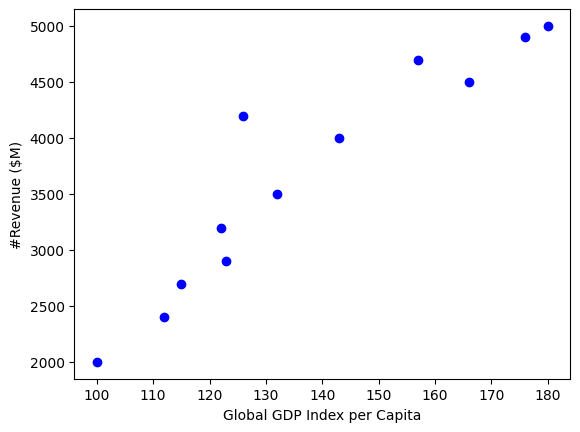

In [ ]:
X = df[['Global GDP Index per Capita']]
y = df['#Revenue ($M)']
plt.scatter(X, y, color = 'blue')
plt.xlabel('Global GDP Index per Capita')
plt.ylabel('#Revenue ($M)')
plt.show()

In [ ]:
X = df[['Global GDP Index per Capita']]
y = df['#Revenue ($M)']
plt.scatter(X, y, color = 'blue')
plt.xlabel('Global GDP Index per Capita')
plt.ylabel('#Revenue ($M)')
plt.show()

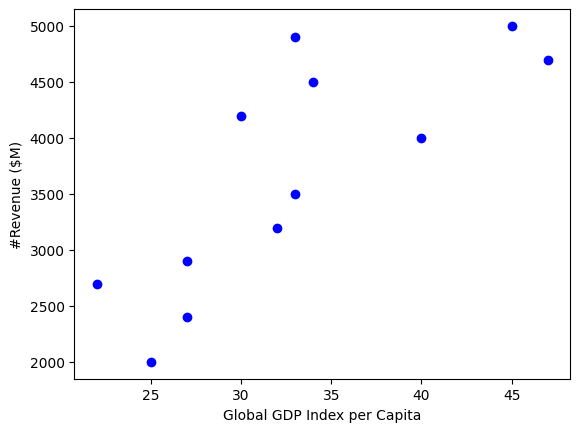

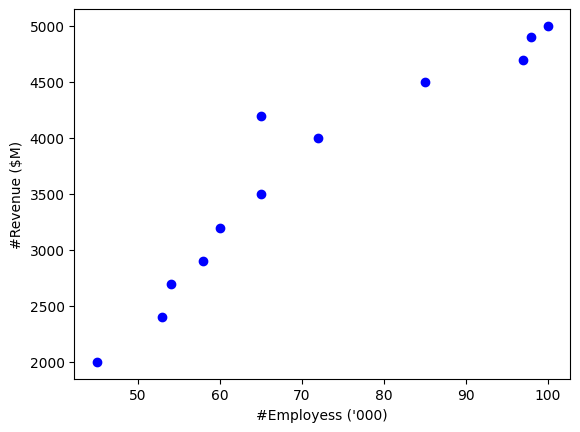

In [ ]:
Xs = df[['#Employess (\'000)']]
ys = df['#Revenue ($M)']
plt.scatter(Xs, ys, color = 'blue')
plt.xlabel('#Employess (\'000)')
plt.ylabel('#Revenue ($M)')
plt.show()

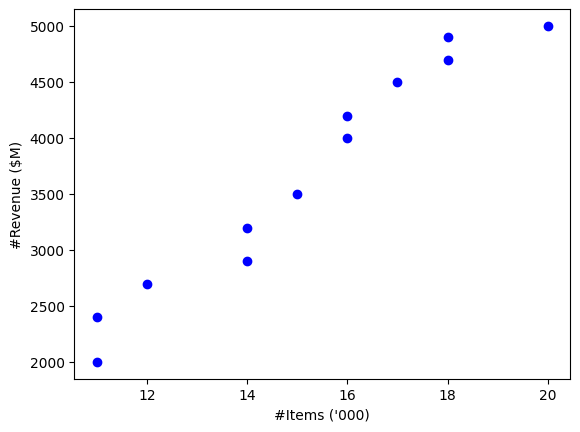

In [ ]:
Xs = df[['#Items (\'000)']]
ys = df['#Revenue ($M)']
plt.scatter(Xs, ys, color = 'blue')
plt.xlabel('#Items (\'000)')
plt.ylabel('#Revenue ($M)')
plt.show()

# **According to the 4 graphs plotted, "Items" Vs "Revenue" has a best straight Line**

b) Produce Simple Linear Regression model by showing the

i)  Graphical representation.  (2 marks)

ii) Intercept. (2 marks)

iii) Coefficient. (2 marks)

iv) The model relationship in the form of y=mx+C. (2 marks)


In [ ]:
# Creating a copy of the DataFrame for processing
cdf = df.copy()
cdf

,Year,Global GDP Index per Capita,#Cust serv Calls ('000s),#Employess ('000),#Items ('000),#Revenue ($M)
0,1,100,25,45,11,2000
1,2,112,27,53,11,2400
2,3,115,22,54,12,2700
3,4,123,27,58,14,2900
4,5,122,32,60,14,3200
5,6,132,33,65,15,3500
6,7,143,40,72,16,4000
7,8,126,30,65,16,4200
8,9,166,34,85,17,4500
9,10,157,47,97,18,4700


In [ ]:
# i have Randomly splitted the data into training and testing sets (80% training, 20% testing)
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [ ]:
# then i have Separated the independent and dependent variables for training
X_train = train[['#Items (\'000)']]
y_train = train['#Revenue ($M)']

# also i have done the same for testing
X_test = test[['#Items (\'000)']]
y_test = test['#Revenue ($M)']

# **Creating the Linear regression Model**
**Training the linear regression model using the training data**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Test the model on the testing data
y_pred = model.predict(X_test)

y_pred

array([3615.29152915, 3962.37623762])

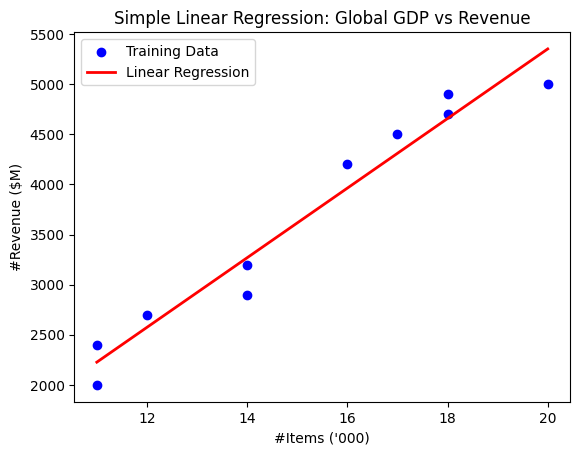

In [ ]:
#1) Graphical representation using a line graph

plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_train, model.coef_[0] * X_train + model.intercept_, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('#Items (\'000)')
plt.ylabel('#Revenue ($M)')
plt.title('Simple Linear Regression: Global GDP vs Revenue')
plt.legend()
plt.show()

In [ ]:
# ii) Intercept
intercept = model.intercept_
print("Intercept:", intercept)


# iii) Coefficient
coefficient = model.coef_[0]
print("Coefficient:", coefficient)



# iv) Model relationship in the form of y=mx+C
print("Model relationship: y =", coefficient, "* x +", intercept)

Intercept: -1590.9790979097916
Coefficient: 347.08470847084715
Model relationship: y = 347.08470847084715 * x + -1590.9790979097916


**# Evaluate the model's performance**

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", r_squared)
print("Mean Squared Error:", mse)

R-squared: 0.8823385264819115
Mean Squared Error: 7353.842094880534


**The Simple Linear Regression model is 88.2%**